In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir('/kaggle/input/')

['cleaned-train', 'mobile-analytics']

In [3]:
train=pd.read_csv('/kaggle/input/mobile-analytics/train_Wc8LBpr.csv')

In [4]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [5]:
test=pd.read_csv('/kaggle/input/mobile-analytics/test_VsU9xXK.csv')

In [6]:
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [7]:
train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [8]:
test.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender'],
      dtype='object')

In [9]:
print(train.shape)
print(test.shape)

(131662, 14)
(87395, 13)


In [10]:
train.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [11]:
train.drop(['Var1'], axis=1, inplace=True)

In [12]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [13]:
train['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

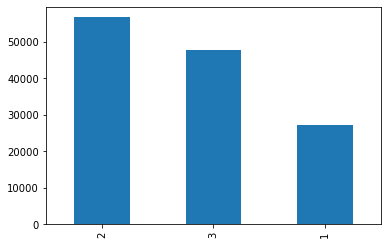

In [14]:
train['Surge_Pricing_Type'].value_counts().plot.bar()

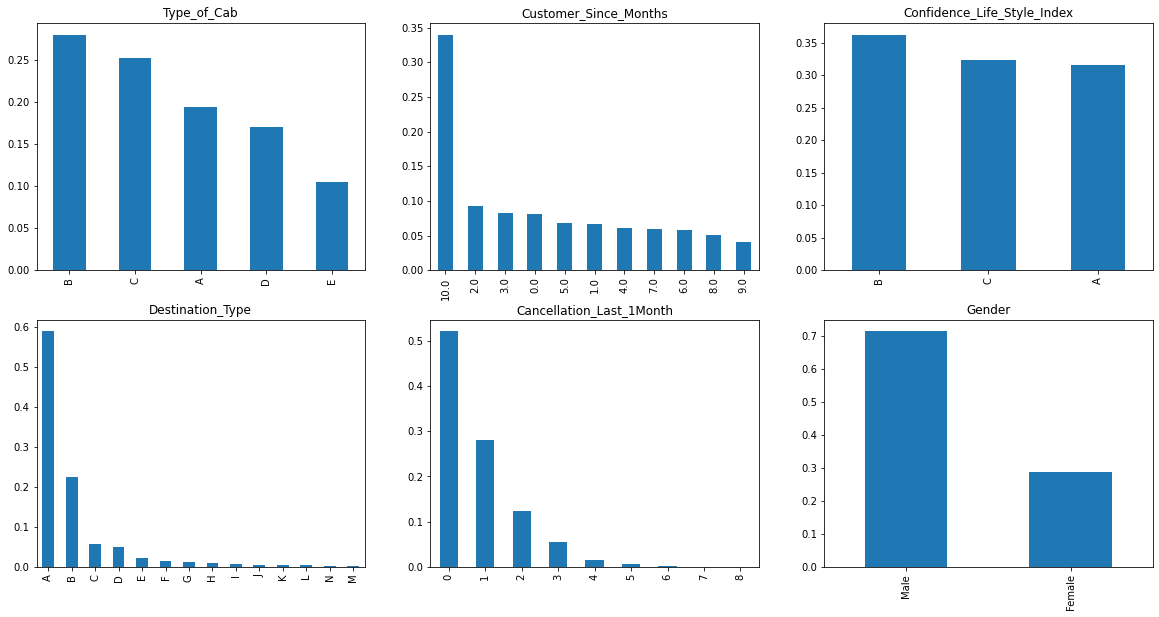

In [15]:
plt.subplot(231)
train['Type_of_Cab'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Type_of_Cab')

plt.subplot(232)
train['Customer_Since_Months'].value_counts(normalize=True).plot.bar(title= 'Customer_Since_Months')

plt.subplot(233)
train['Confidence_Life_Style_Index'].value_counts(normalize=True).plot.bar(title= 'Confidence_Life_Style_Index')

plt.subplot(234)
train['Destination_Type'].value_counts(normalize=True).plot.bar(title= 'Destination_Type')

plt.subplot(235)
train['Cancellation_Last_1Month'].value_counts(normalize=True).plot.bar(title= 'Cancellation_Last_1Month')

plt.subplot(236)
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

plt.show()

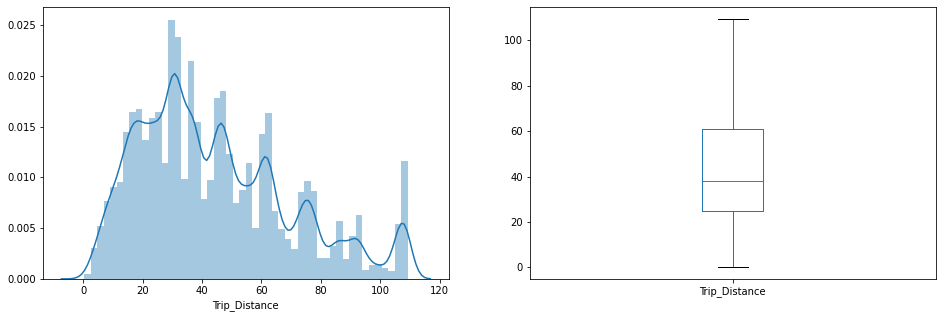

In [16]:
plt.subplot(121)
sns.distplot(train['Trip_Distance']);

plt.subplot(122)
train['Trip_Distance'].plot.box(figsize=(16,5))

plt.show()
# not gaussian

In [17]:
train['Trip_Distance'].describe()

count    131662.000000
mean         44.200909
std          25.522882
min           0.310000
25%          24.580000
50%          38.200000
75%          60.730000
max         109.230000
Name: Trip_Distance, dtype: float64

Text(0.5, 0.98, '')

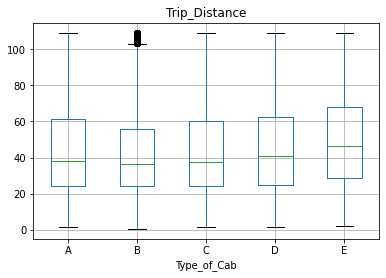

In [18]:
train.boxplot(column='Trip_Distance', by = 'Type_of_Cab')
plt.suptitle("")
# train['Trip_Distance'].plot(kind='box', by='Type_of_Ca')

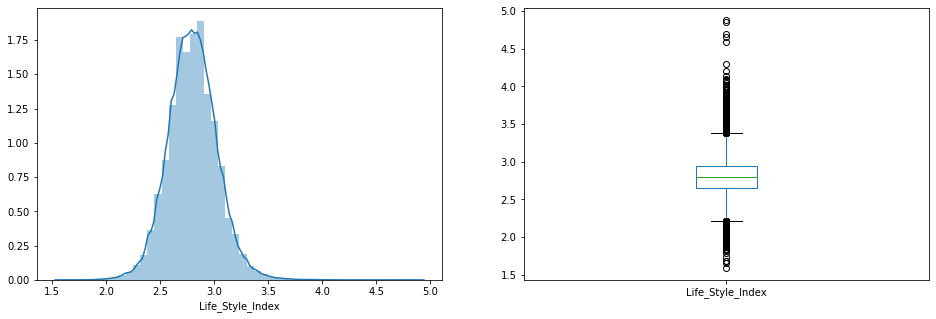

In [19]:
plt.subplot(121)
sns.distplot(train['Life_Style_Index']);

plt.subplot(122)
train['Life_Style_Index'].plot.box(figsize=(16,5))

plt.show()
# not gaussian, outliers present

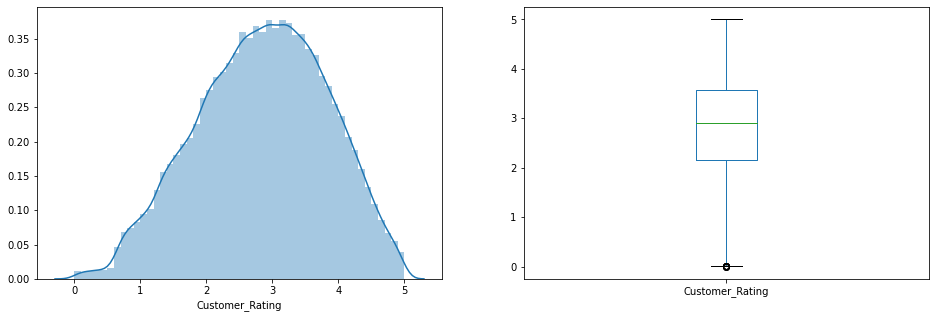

In [20]:
plt.subplot(121)
sns.distplot(train['Customer_Rating']);

plt.subplot(122)
train['Customer_Rating'].plot.box(figsize=(16,5))

plt.show()
# perfect

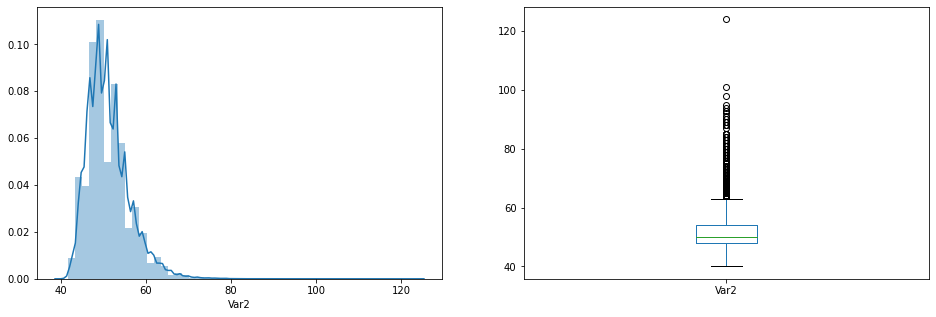

In [21]:
plt.subplot(121)
sns.distplot(train['Var2']);

plt.subplot(122)
train['Var2'].plot.box(figsize=(16,5))

plt.show()
# not gaussian, outliers present

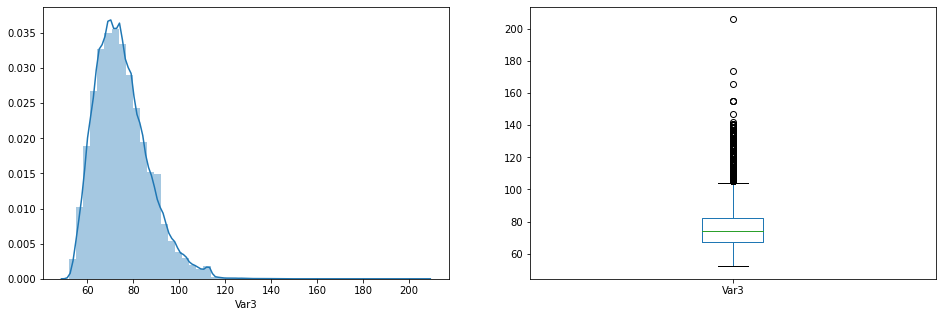

In [22]:
plt.subplot(121)
sns.distplot(train['Var3']);

plt.subplot(122)
train['Var3'].plot.box(figsize=(16,5))

plt.show()
# closer to gaussian, have to deal with outliers

In [23]:
pd.crosstab(train['Surge_Pricing_Type'], train['Type_of_Cab'])
# results shows it is very imp parameter in determining output

Type_of_Cab,A,B,C,D,E
Surge_Pricing_Type,,,,,
1,14916,4918,1037,1065,1073
2,2258,23852,17290,2511,2172
3,4395,2366,9795,15415,8389


In [24]:
pd.crosstab(train['Surge_Pricing_Type'],train['Gender'])
# less imp factor

Gender,Female,Male
Surge_Pricing_Type,,
1,7758,19456
2,16403,40325
3,13601,34119


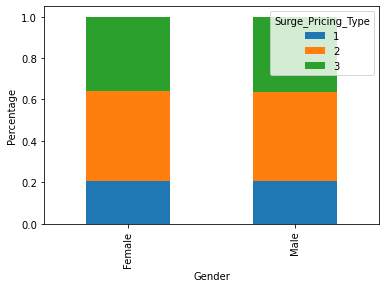

In [25]:
Gender = pd.crosstab(train['Gender'],train['Surge_Pricing_Type'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Gender')
P = plt.ylabel('Percentage')
# proves gender is less imp

In [26]:
pd.crosstab(train['Surge_Pricing_Type'],train['Destination_Type'])
# Destination type also affects the result but it contributes very less bcz distribution 
# is very non uniform and some classes having extremely high no. of eg. compared to others

Destination_Type,A,B,C,D,E,F,G,H,I,J,K,L,M,N
Surge_Pricing_Type,,,,,,,,,,,,,,
1,13752,8477,1778,860,820,263,529,178,99,113,164,131,19,31
2,33913,13681,3093,2260,1101,626,597,468,248,235,226,195,26,59
3,29932,7397,2613,3468,796,1061,363,614,466,347,290,317,48,8


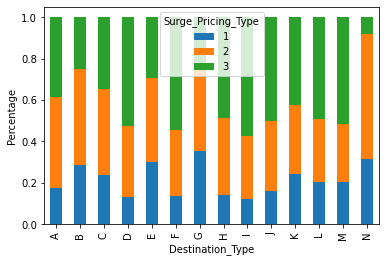

In [27]:
Des_type = pd.crosstab(train['Destination_Type'],train['Surge_Pricing_Type'])
Des_type.div(Des_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Destination_Type')
P = plt.ylabel('Percentage')
# affects the result

In [28]:
pd.crosstab(train['Surge_Pricing_Type'],train['Cancellation_Last_1Month'])
# Cancellation_Last_1Month also affects the result but it contributes very less bcz distribution 
# is very non uniform and some classes having extremely high no. of eg. compared to others

Cancellation_Last_1Month,0,1,2,3,4,5,6,7,8
Surge_Pricing_Type,,,,,,,,,
1,17673,6374,2119,828,160,47,13,0,0
2,31429,15434,6318,2551,633,246,105,12,0
3,19585,15026,7786,3763,1030,375,148,4,3


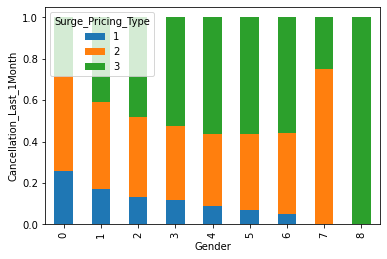

In [29]:
canc = pd.crosstab(train['Cancellation_Last_1Month'],train['Surge_Pricing_Type'])
canc.div(canc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Gender')
P = plt.ylabel('Cancellation_Last_1Month')
# affects the result

In [30]:
pd.crosstab(train['Surge_Pricing_Type'],train['Customer_Since_Months'])
# very less imp factor

Customer_Since_Months,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Surge_Pricing_Type,,,,,,,,,,,
1,2225,1803,2435,2283,1643,1826,1490,1478,1291,1018,8575
2,4524,3637,5139,4491,3382,3695,3148,3145,2774,2183,18070
3,3420,2857,4047,3577,2701,3120,2737,2784,2263,1946,16035


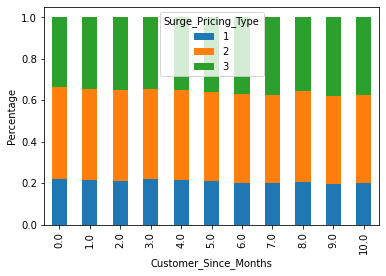

In [31]:
canc = pd.crosstab(train['Customer_Since_Months'],train['Surge_Pricing_Type'])
canc.div(canc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Customer_Since_Months')
P = plt.ylabel('Percentage')
# very less imp factor

In [32]:
train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

In [33]:
pd.crosstab(train['Surge_Pricing_Type'],train['Confidence_Life_Style_Index'])
# affect results

Confidence_Life_Style_Index,A,B,C
Surge_Pricing_Type,,,
1,10170,5821,7047
2,16948,15495,15648
3,8029,19039,13272


Surge_Pricing_Type
1    41.061633
2    41.269265
3    49.476234
Name: Trip_Distance, dtype: float64


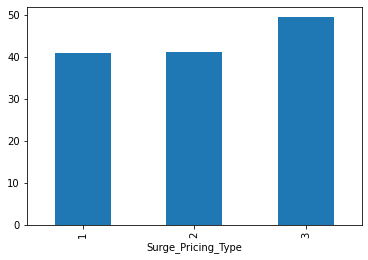

In [34]:
print(train.groupby('Surge_Pricing_Type')['Trip_Distance'].mean())

train.groupby('Surge_Pricing_Type')['Trip_Distance'].mean().plot.bar()
# will look further

Surge_Pricing_Type
1    2.847554
2    2.789416
3    2.791163
Name: Life_Style_Index, dtype: float64


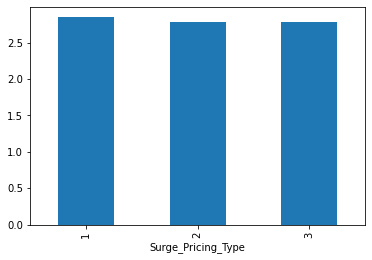

In [35]:
print(train.groupby('Surge_Pricing_Type')['Life_Style_Index'].mean())

train.groupby('Surge_Pricing_Type')['Life_Style_Index'].mean().plot.bar()
# less imp

Surge_Pricing_Type
1    3.112791
2    2.857688
3    2.689500
Name: Customer_Rating, dtype: float64


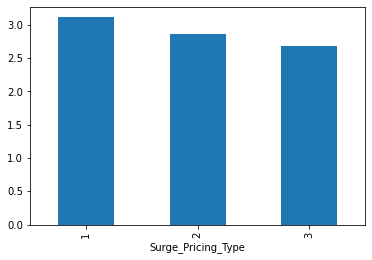

In [36]:
print(train.groupby('Surge_Pricing_Type')['Customer_Rating'].mean())

train.groupby('Surge_Pricing_Type')['Customer_Rating'].mean().plot.bar()
# less imp

Surge_Pricing_Type
1    51.316785
2    51.064078
3    51.302703
Name: Var2, dtype: float64


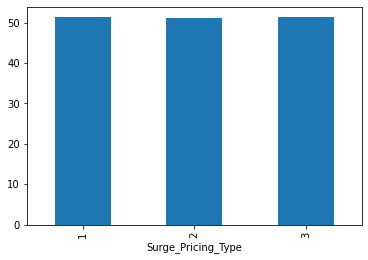

In [37]:
print(train.groupby('Surge_Pricing_Type')['Var2'].mean())

train.groupby('Surge_Pricing_Type')['Var2'].mean().plot.bar()
# less imp

Surge_Pricing_Type
1    76.252223
2    74.772299
3    74.829757
Name: Var3, dtype: float64


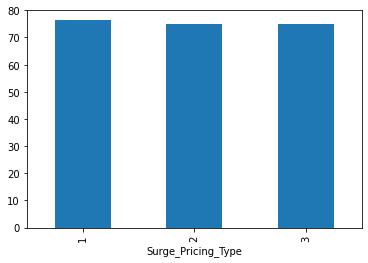

In [38]:
print(train.groupby('Surge_Pricing_Type')['Var3'].mean())

train.groupby('Surge_Pricing_Type')['Var3'].mean().plot.bar()
# less imp

In [39]:
df=train.dropna()

In [40]:
bins = [0,15,35,50,80,120]
group = ['Very Low', 'Low', 'Medium', 'High', 'Very high']
train['Trip_dis_bin'] = pd.cut(df['Trip_Distance'],bins,labels=group)

Trip_dis_bin        Very Low    Low  Medium  High  Very high
Surge_Pricing_Type                                          
1                       1687   6826    4388  4618       1111
2                       3903  14463    8899  8695       2958
3                       3009   8446    6723  8971       5355


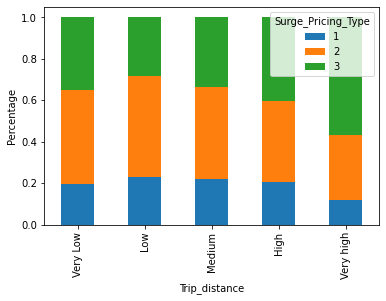

In [41]:
print(pd.crosstab(train['Surge_Pricing_Type'],train['Trip_dis_bin']))
Trip_dis_bin = pd.crosstab(train['Trip_dis_bin'],train['Surge_Pricing_Type'])
Trip_dis_bin.div(Trip_dis_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Trip_distance')
P = plt.ylabel('Percentage')
# significant factor

In [42]:
bins = [0,1,2,3,4,5]
group = ['Very Low', 'Low', 'Medium', 'High', 'Very high']
train['l1'] = pd.cut(df['Life_Style_Index'],bins,labels=group)

l1                  Low  Medium  High  Very high
Surge_Pricing_Type                              
1                     4   14153  4464          9
2                    13   32447  6454          4
3                    10   27152  5341          1


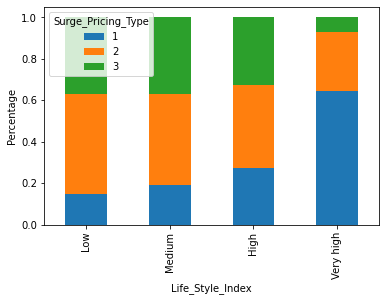

In [43]:
print(pd.crosstab(train['Surge_Pricing_Type'],train['l1']))
Life_Style_bin = pd.crosstab(train['l1'], train['Surge_Pricing_Type'])
Life_Style_bin.div(Life_Style_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Life_Style_Index')
P = plt.ylabel('Percentage')
# significant factor

In [44]:
train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type', 'Trip_dis_bin', 'l1'],
      dtype='object')

In [45]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type,Trip_dis_bin,l1
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,46,60,Female,2,Very Low,Medium
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,56,78,Male,2,Low,Medium
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,56,77,Male,2,NaN,NaN
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,52,74,Male,3,NaN,NaN
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,49,102,Male,2,High,High


In [46]:
train.drop(['Trip_dis_bin', 'l1'], axis=1, inplace=True)

In [47]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,49,102,Male,2


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.116812,0.509482,-0.054654,-0.007686,0.200456,0.231706,0.135928
Customer_Since_Months,0.116812,1.000000,0.135114,-0.050349,-0.006325,0.042637,0.113403,0.027827
Life_Style_Index,0.509482,0.135114,1.000000,0.205824,0.074023,0.234754,0.329312,-0.080108
Customer_Rating,-0.054654,-0.050349,0.205824,1.000000,0.003595,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006325,0.074023,0.003595,1.000000,0.095830,0.128686,0.185646
Var2,0.200456,0.042637,0.234754,-0.302968,0.095830,1.000000,0.683437,0.003437
Var3,0.231706,0.113403,0.329312,-0.227531,0.128686,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027827,-0.080108,-0.155279,0.185646,0.003437,-0.039309,1.000000


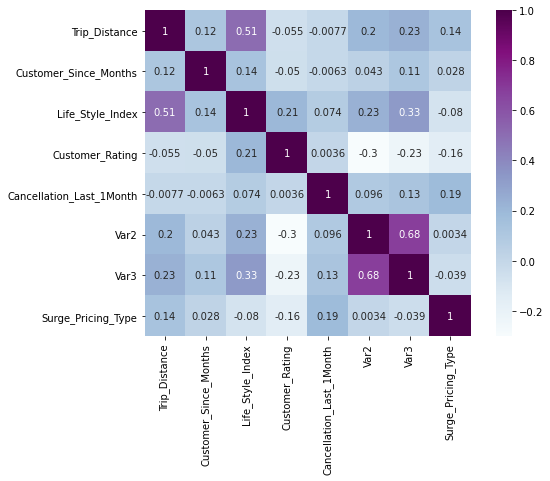

In [48]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

In [49]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [50]:
train['Type_of_Cab'].value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

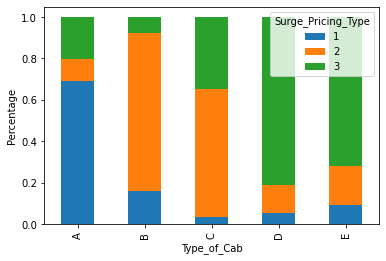

In [51]:
Des_type = pd.crosstab(train['Type_of_Cab'],train['Surge_Pricing_Type'])
Des_type.div(Des_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Type_of_Cab')
P = plt.ylabel('Percentage')

In [52]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [53]:
# X=train.drop(['Trip_ID', 'Surge_Pricing_Type'], axis=1)

In [54]:
# X.head()

In [55]:
# train.dtypes

In [56]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [57]:
# X1=pd.get_dummies(train['Type_of_Cab'])

In [58]:
# train.drop(['Type_of_Cab'], 1, inplace=True)

In [59]:
# train1=pd.concat([train, X1], axis=1)

In [60]:
# train1.dtypes

In [61]:
# train1.drop(['Trip_ID'], 1, inplace=True)

In [62]:
# X2=pd.get_dummies(train1['Gender'])
# X3=pd.get_dummies(train1['Confidence_Life_Style_Index'])
# X4=pd.get_dummies(train1['Destination_Type'])

In [63]:
# train1.drop(['Gender', 'Confidence_Life_Style_Index', 'Destination_Type'], 1, inplace=True)
# train1=pd.concat([train1, X2, X3, X4], axis=1)

In [64]:
# train1.columns

In [65]:
# imputer.fit(train1)

In [66]:
# train1 = imputer.transform(train1)

In [67]:
# train1=pd.DataFrame(train1)

In [68]:
# train1.isnull().sum()

In [69]:
# train1.head(10)

In [70]:
train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

In [71]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [72]:
train['Gender']=train['Gender'].astype('category')
train['Confidence_Life_Style_Index']=train['Confidence_Life_Style_Index'].astype('category')
train['Destination_Type']=train['Destination_Type'].astype('category')
train['Type_of_Cab']=train['Type_of_Cab'].astype('category')

In [73]:
cat_columns = train.select_dtypes(['category']).columns
train[cat_columns] = train[cat_columns].apply(lambda x: x.cat.codes)

In [74]:
train.drop(['Trip_ID'], 1, inplace=True)

In [75]:
train.head(10)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1,1.0,2.42769,0,0,3.90500,0,46,60,0,2
1,29.47,1,10.0,2.78245,1,0,3.45000,0,56,78,1,2
2,41.58,-1,10.0,NaN,-1,4,3.50125,2,56,77,1,2
3,61.56,2,10.0,NaN,-1,0,3.45375,0,52,74,1,3
4,54.95,2,10.0,3.03453,1,0,3.40250,4,49,102,1,2
5,19.06,4,10.0,NaN,-1,0,2.59750,1,63,91,1,3
6,29.72,4,10.0,2.83958,2,1,2.97500,1,50,75,1,2
7,18.44,1,2.0,2.81871,1,0,3.58250,0,46,63,1,2
8,106.80,2,3.0,NaN,-1,0,3.14625,0,58,92,1,2
9,107.19,3,5.0,3.04467,1,0,2.44375,1,58,83,1,3


In [76]:
train.replace(-1, np.nan, inplace=True)

In [77]:
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1.0,1.0,2.42769,0.0,0,3.90500,0,46,60,0,2
1,29.47,1.0,10.0,2.78245,1.0,0,3.45000,0,56,78,1,2
2,41.58,NaN,10.0,NaN,NaN,4,3.50125,2,56,77,1,2
3,61.56,2.0,10.0,NaN,NaN,0,3.45375,0,52,74,1,3
4,54.95,2.0,10.0,3.03453,1.0,0,3.40250,4,49,102,1,2


In [78]:
train.dtypes

Trip_Distance                  float64
Type_of_Cab                    float64
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index    float64
Destination_Type                  int8
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                            int8
Surge_Pricing_Type               int64
dtype: object

In [79]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [80]:
imputer.fit(train)

KNNImputer()

In [81]:
train = imputer.transform(train)

In [82]:
train=pd.DataFrame(train)
train.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.77,1.0,1.0,2.427690,0.0,0.0,3.90500,0.0,46.0,60.0,0.0,2.0
1,29.47,1.0,10.0,2.782450,1.0,0.0,3.45000,0.0,56.0,78.0,1.0,2.0
2,41.58,2.0,10.0,2.925064,1.0,4.0,3.50125,2.0,56.0,77.0,1.0,2.0
3,61.56,2.0,10.0,2.832450,1.6,0.0,3.45375,0.0,52.0,74.0,1.0,3.0
4,54.95,2.0,10.0,3.034530,1.0,0.0,3.40250,4.0,49.0,102.0,1.0,2.0
5,19.06,4.0,10.0,2.923442,1.0,0.0,2.59750,1.0,63.0,91.0,1.0,3.0
6,29.72,4.0,10.0,2.839580,2.0,1.0,2.97500,1.0,50.0,75.0,1.0,2.0
7,18.44,1.0,2.0,2.818710,1.0,0.0,3.58250,0.0,46.0,63.0,1.0,2.0
8,106.80,2.0,3.0,3.078662,1.2,0.0,3.14625,0.0,58.0,92.0,1.0,2.0
9,107.19,3.0,5.0,3.044670,1.0,0.0,2.44375,1.0,58.0,83.0,1.0,3.0


In [83]:
test.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender'],
      dtype='object')

In [84]:
train.columns=['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type']

In [85]:
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1.0,1.0,2.427690,0.0,0.0,3.90500,0.0,46.0,60.0,0.0,2.0
1,29.47,1.0,10.0,2.782450,1.0,0.0,3.45000,0.0,56.0,78.0,1.0,2.0
2,41.58,2.0,10.0,2.925064,1.0,4.0,3.50125,2.0,56.0,77.0,1.0,2.0
3,61.56,2.0,10.0,2.832450,1.6,0.0,3.45375,0.0,52.0,74.0,1.0,3.0
4,54.95,2.0,10.0,3.034530,1.0,0.0,3.40250,4.0,49.0,102.0,1.0,2.0


In [86]:
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1.0,1.0,2.427690,0.0,0.0,3.90500,0.0,46.0,60.0,0.0,2.0
1,29.47,1.0,10.0,2.782450,1.0,0.0,3.45000,0.0,56.0,78.0,1.0,2.0
2,41.58,2.0,10.0,2.925064,1.0,4.0,3.50125,2.0,56.0,77.0,1.0,2.0
3,61.56,2.0,10.0,2.832450,1.6,0.0,3.45375,0.0,52.0,74.0,1.0,3.0
4,54.95,2.0,10.0,3.034530,1.0,0.0,3.40250,4.0,49.0,102.0,1.0,2.0


In [87]:
train.to_csv('/kaggle/working/cleaned_train.csv')

In [88]:
# after log transformation

# ax1 = plt.subplot(121)
# train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
# ax1.set_title("Train")

# ax2 = plt.subplot(122)
# test['LoanAmount_log'].hist(bins=20)
# ax2.set_title("Test")

In [89]:
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1.0,1.0,2.427690,0.0,0.0,3.90500,0.0,46.0,60.0,0.0,2.0
1,29.47,1.0,10.0,2.782450,1.0,0.0,3.45000,0.0,56.0,78.0,1.0,2.0
2,41.58,2.0,10.0,2.925064,1.0,4.0,3.50125,2.0,56.0,77.0,1.0,2.0
3,61.56,2.0,10.0,2.832450,1.6,0.0,3.45375,0.0,52.0,74.0,1.0,3.0
4,54.95,2.0,10.0,3.034530,1.0,0.0,3.40250,4.0,49.0,102.0,1.0,2.0


In [90]:
X = train.drop(['Surge_Pricing_Type'], 1)

In [91]:
y = train.Surge_Pricing_Type

In [92]:
X = pd.get_dummies(X)

In [93]:
X.shape

(131662, 11)

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((105329, 11), (26333, 11), (105329,), (26333,))

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [96]:
model = LogisticRegression()
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [97]:
pred_cv = model.predict(x_cv)

In [98]:
accuracy_score(y_cv, pred_cv)

0.6605400068355296

[[2985 2046  449]
 [ 567 8412 2375]
 [ 615 2887 5997]]


Text(33.0, 0.5, 'True')

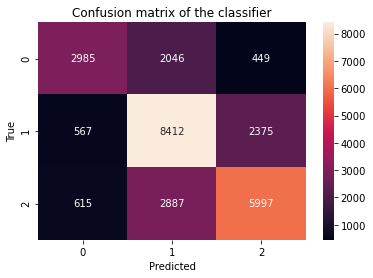

In [99]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

         1.0       0.72      0.54      0.62      5480
         2.0       0.63      0.74      0.68     11354
         3.0       0.68      0.63      0.65      9499

    accuracy                           0.66     26333
   macro avg       0.68      0.64      0.65     26333
weighted avg       0.67      0.66      0.66     26333



In [101]:
# from sklearn.model_selection import StratifiedKFold

In [106]:
# mean_accuracy = []
# i = 1
# kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# for train_index, test_index in kf.split(X, y):
#     print('\n{} of kfold {}'.format(i, kf.n_splits))
#     xtr, xvl = X.loc[train_index], X.loc[test_index]
#     ytr, yvl = y[train_index], y[test_index]
    
#     model = LogisticRegression(random_state=1)
#     model.fit(xtr, ytr)
#     pred_test = model.predict(xvl)
#     score = accuracy_score(yvl, pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score', score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# # make prediction on test set
# # pred_test = model.predict(test)


# # calculate probability estimates of loan approval
# # column 0 is the probability for class 0 and column 1 is the probability for class 1
# # probability of loan default = 1 - model.predict_proba(test)[:,1]
# pred = model.predict_proba(xvl)[:,1]


1 of kfold 5


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.6632362434967531

2 of kfold 5


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.6645653742452436

3 of kfold 5


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.6606410451162085

4 of kfold 5


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.6657678869816194

5 of kfold 5
accuracy_score 0.6650463314598207

Mean validation accuracy:  0.6638513762599291


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
X.head()

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=15, n_estimators=181)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.7082368131242167

2 of kfold 5
accuracy_score 0.7072874340181521

3 of kfold 5
accuracy_score 0.7040103296369437

4 of kfold 5
accuracy_score 0.7081497797356828

5 of kfold 5
accuracy_score 0.7139981771228923

Mean validation accuracy:  0.7083365067275775


In [ ]:
# from sklearn.model_selection import GridSearchCV
# paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
# grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)
# from sklearn.model_selection import train_test_split
# x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
# grid_search.fit(x_train, y_train)
# grid_search.best_estimator_

In [ ]:
# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
    
#     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)
#     model.fit(xtr, ytr)
#     pred_test = model.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test = model.predict(test)
# pred2=model.predict_proba(test)[:,1]

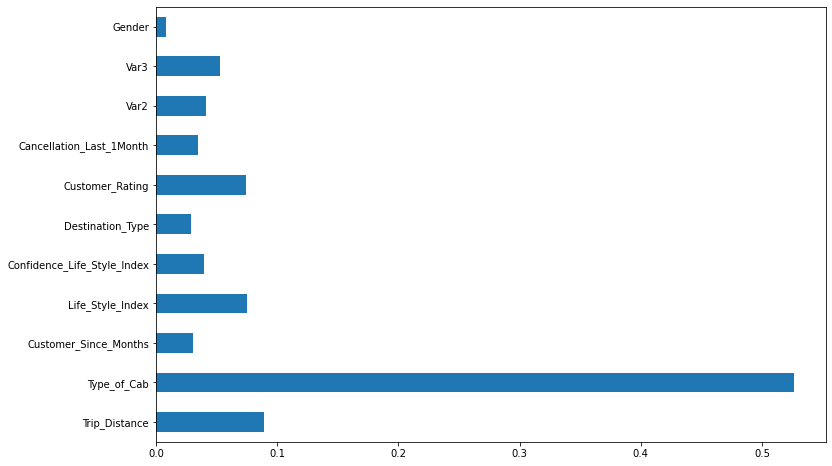

In [109]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
# dominance of feature- type of cab which was seen earlier also, which also contain missing value.
# so cannot avoid using inputing methods to replace missing value.